In [1]:
import numpy as np 
import pandas as pd 
pd.set_option('mode.chained_assignment', None)

import matplotlib.pyplot as plt
import seaborn as sns 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/food-choices/food_coded.csv
/kaggle/input/food-choices/codebook_food.docx


**DATA MINING QUESTION: Are there correlations between the most common comfort foods and the most common  comfort food reasons? If so, what would those correlations be, and what do they tell us about students?**

In [2]:
df = pd.read_csv('/kaggle/input/food-choices/food_coded.csv')
df

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,3.5,1,1,610,4.0,420.0,2,"wine. mac and cheese, pizza, ice cream",boredom and sadness,NaN,...,1.0,1.0,5,940.0,500,Softball,5,1,1315,156
121,3,1,1,265,2.0,315.0,2,Pizza / Wings / Cheesecake,Loneliness / Homesick / Sadness,NaN,...,1.0,NaN,4,940.0,500,basketball,5,2,1315,180
122,3.882,1,1,720,NaN,420.0,1,"rice, potato, seaweed soup",sadness,NaN,...,1.0,2.0,5,580.0,690,none,4,2,1315,120
123,3,2,1,720,4.0,420.0,1,"Mac n Cheese, Lasagna, Pizza","happiness, they are some of my favorite foods",NaN,...,2.0,2.0,1,940.0,500,NaN,3,1,1315,135


**DATA CLEANING FOR THE DATA FRAME**

GPA 2
calories_day 19
calories_scone 1
comfort_food 1
comfort_food_reasons 1
comfort_food_reasons_coded 19
cook 3
cuisine 17
diet_current 1
drink 2
eating_changes 3
employment 9
exercise 13
father_education 1
father_profession 3
fav_cuisine 2
fav_food 2
food_childhood 1
healthy_meal 1
ideal_diet 1
income 1
life_rewarding 1
marital_status 1
meals_dinner_friend 3
mother_education 3
mother_profession 2
on_off_campus 1
persian_food 1
self_perception_weight 1
soup 1
sports 2
tortilla_calories 1
type_sports 21
weight 2


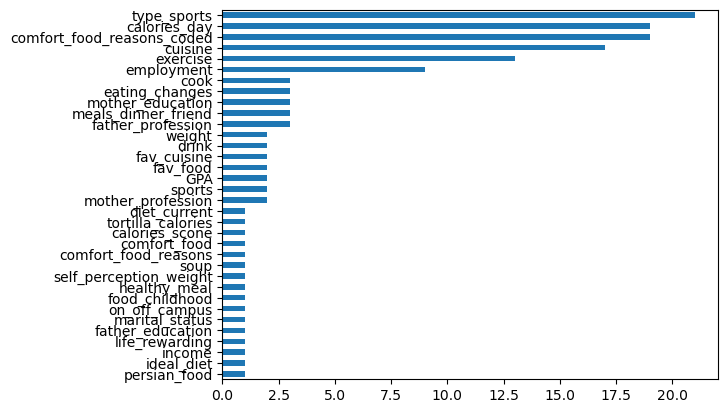

<Figure size 1500x1000 with 0 Axes>

In [3]:

cols_m = [col for col in df.columns if df[col].isnull().any()] 
for i in cols_m:
    print(i,df[i].isnull().sum())
df.isnull().sum()[df.isnull().sum()>0].sort_values().plot.barh()
plt.figure(figsize = (15,10))
plt.show()

Seems that the attributes with the most "nulls" are:
* calories_day,
* comfort_food_reasons_coded,
* cuisine,
* employment,
* exercise,
* type_sports**

In [4]:
# Shows the minimums and maximums of each attribute 
df.describe()

,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,...,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,veggies_day,vitamins,waffle_calories
count,125.000000,125.000000,125.000000,106.000000,124.000000,125.00000,106.000000,122.000000,125.000000,108.000000,...,124.000000,124.000000,124.000000,123.000000,125.000000,124.000000,125.000000,125.000000,125.000000,125.000000
mean,1.392000,1.112000,577.320000,3.028302,505.241935,1.75200,2.698113,2.786885,2.688000,1.388889,...,2.806452,3.120968,1.217742,1.390244,3.336000,947.580645,555.040000,4.008000,1.512000,1073.400000
std,0.490161,0.316636,131.214156,0.639308,230.840506,0.43359,1.972042,1.038351,1.910987,0.974759,...,1.423824,1.115980,0.414385,0.489800,1.436528,202.090179,152.370379,1.081337,0.501867,248.667092
min,1.000000,1.000000,265.000000,2.000000,315.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,580.000000,345.000000,1.000000,1.000000,575.000000
25%,1.000000,1.000000,430.000000,3.000000,420.000000,2.00000,2.000000,2.000000,2.000000,1.000000,...,2.000000,2.000000,1.000000,1.000000,2.000000,725.000000,500.000000,3.000000,1.000000,900.000000
50%,1.000000,1.000000,610.000000,3.000000,420.000000,2.00000,2.000000,3.000000,2.000000,1.000000,...,3.000000,3.000000,1.000000,1.000000,3.000000,940.000000,500.000000,4.000000,2.000000,900.000000
75%,2.000000,1.000000,720.000000,3.000000,420.000000,2.00000,3.000000,3.000000,3.000000,1.000000,...,4.000000,4.000000,1.000000,2.000000,5.000000,1165.000000,690.000000,5.000000,2.000000,1315.000000
max,2.000000,2.000000,720.000000,4.000000,980.000000,2.00000,9.000000,5.000000,9.000000,6.000000,...,5.000000,6.000000,2.000000,2.000000,5.000000,1165.000000,850.000000,5.000000,2.000000,1315.000000


**All of the attributes with the most "nulls" will be replaced with their miminmum values**

In [5]:
df['calories_day'].fillna(4,inplace=True)
df['comfort_food_reasons_coded'].fillna(9,inplace=True)
df['cuisine'].fillna(6,inplace=True)
df['employment'].fillna(4,inplace=True)
df['exercise'].fillna(5,inplace=True)
df['type_sports'].fillna('nothing',inplace=True)


In [6]:
# Shows how many rows and columns are currenlty in the data frame  
df.shape

(125, 61)

**For all other records with "null", they will be taken out of the data frame**

In [7]:
for i in cols_m:
    df = df[~df[i].isnull()]
# Shows how many rows and columns there are after the deletion of many records 
df.shape
df

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,4.0,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,nothing,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,3.63,1,1,430,3.0,420.0,1,"Chinese, chips, cake",Stress and boredom,9.0,...,1.0,2.0,4,940.0,345,None,5,2,1315,140
119,3.2,2,1,610,3.0,420.0,2,"chips, rice, chicken curry,","Happiness, boredom, social event",9.0,...,1.0,1.0,5,1165.0,690,Soccer,5,2,1315,185
120,3.5,1,1,610,4.0,420.0,2,"wine. mac and cheese, pizza, ice cream",boredom and sadness,9.0,...,1.0,1.0,5,940.0,500,Softball,5,1,1315,156
122,3.882,1,1,720,4.0,420.0,1,"rice, potato, seaweed soup",sadness,9.0,...,1.0,2.0,5,580.0,690,none,4,2,1315,120


**CHECKING THE ATTRIBUTES**

In [12]:
df['Gender'].value_counts()
df['breakfast'].value_counts()
df['calories_chicken'].value_counts()

610    49
720    25
430    19
265     5
Name: calories_chicken, dtype: int64

In [13]:
df['calories_day'] = df['calories_day'].astype(int)
df['calories_day'].value_counts()
df['calories_scone'] = df['calories_scone'].astype(int)
df['calories_scone'].value_counts()
df['coffee'].value_counts()

2    72
1    26
Name: coffee, dtype: int64

In [14]:
df['comfort_food'].value_counts()
df['comfort_food_reasons'].value_counts()
df['comfort_food_reasons_coded'].value_counts()

2.0    36
1.0    21
9.0    19
3.0    12
7.0     3
5.0     3
4.0     2
6.0     1
8.0     1
Name: comfort_food_reasons_coded, dtype: int64

In [15]:
df['cook'].value_counts()
df['cuisine'].value_counts()
df['diet_current'].value_counts()
df['diet_current_coded'].value_counts()

2    44
1    42
3    10
4     2
Name: diet_current_coded, dtype: int64

In [16]:
df['drink'].value_counts()
df['eating_changes'].value_counts()
df['eating_changes_coded'].value_counts()
df['eating_changes_coded1'].value_counts()

3     37
5     24
2     13
4      7
8      4
10     3
11     3
7      2
1      1
6      1
9      1
13     1
12     1
Name: eating_changes_coded1, dtype: int64

In [17]:
df['exercise'].value_counts()

1.0    49
2.0    32
3.0     9
5.0     8
Name: exercise, dtype: int64

In [18]:
df['father_education'].value_counts()
df['father_profession'].value_counts()
df['mother_education'] = df['mother_education'].astype(int)
df['mother_education'].value_counts()
df['mother_profession'].value_counts()

Teacher                                      3
Nurse                                        2
Banker                                       2
Secretary                                    2
unemployed                                   1
                                            ..
Works in retail                              1
stylist                                      1
management                                   1
Strategic Planning and Programs Manager      1
Receptionist for a medical supply company    1
Name: mother_profession, Length: 93, dtype: int64

**THE "WEIGHT" ATTRIBUTE HAS SOME INCORRECT DATA**

In [28]:
df['weight'].value_counts()

140                         7
150                         6
135                         6
190                         5
155                         5
175                         5
170                         5
185                         5
145                         4
130                         4
165                         4
125                         4
200                         3
180                         3
120                         3
129                         2
210                         2
160                         2
113                         2
167                         2
144 lbs                     1
260                         1
184                         1
192                         1
128                         1
138                         1
187                         1
169                         1
168                         1
205                         1
105                         1
123                         1
264                         1
110       

**All data that are string values and no integer values will be removed from the data set**

In [29]:
df = df[df['weight'].str.isdigit()]

In [30]:
df

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.400,2,1,430,4,315,1,none,we dont have comfort,9.0,...,1,1,1,1165,345,car racing,5,1,1315,187
1,3.654,1,1,610,3,420,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1,1,2,725,690,Basketball,4,2,900,155
4,3.500,1,1,720,2,420,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1,1,4,940,500,Softball,4,2,760,190
5,2.250,1,1,610,3,980,2,"Candy, brownies and soda.","None, i don't eat comfort food. I just eat whe...",4.0,...,1,2,4,940,345,None.,1,2,1315,190
6,3.800,2,1,610,3,420,2,"Chocolate, ice cream, french fries, pretzels","stress, boredom",1.0,...,1,1,5,940,690,soccer,4,1,1315,180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,3.630,1,1,430,3,420,1,"Chinese, chips, cake",Stress and boredom,9.0,...,1,2,4,940,345,None,5,2,1315,140
119,3.200,2,1,610,3,420,2,"chips, rice, chicken curry,","Happiness, boredom, social event",9.0,...,1,1,5,1165,690,Soccer,5,2,1315,185
120,3.500,1,1,610,4,420,2,"wine. mac and cheese, pizza, ice cream",boredom and sadness,9.0,...,1,1,5,940,500,Softball,5,1,1315,156
122,3.882,1,1,720,4,420,1,"rice, potato, seaweed soup",sadness,9.0,...,1,2,5,580,690,none,4,2,1315,120


**New shape of the dataset**

In [31]:
df.shape

(95, 61)

**Now, the attributes that will be checked more thoroughly are the ones titled "comfort_food" and "comfort_food_reasons"**

**This is because they will be the only ones used for the study**

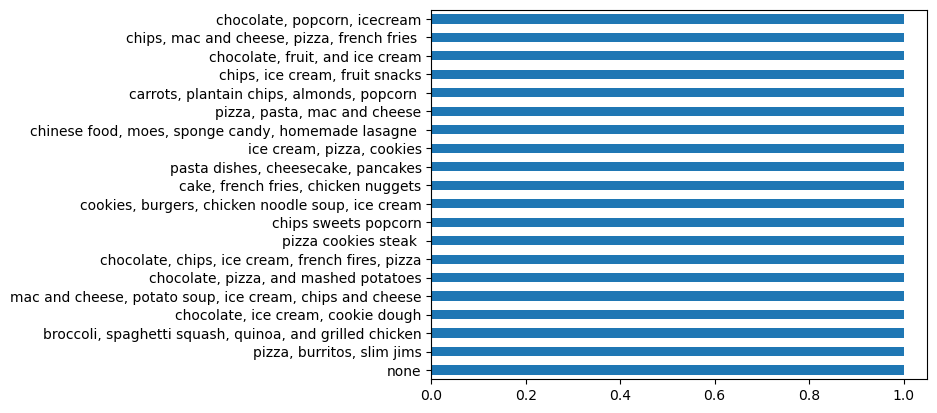

<Figure size 1500x500 with 0 Axes>

In [32]:
df['comfort_food'].value_counts()

# ALL OF THE ELEMENTS IN THE 'COMFORT_FOOD' ATTRIBUTE WILL BE CHANGED TO LOWER CASE
df['comfort_food'] = df['comfort_food'].str.lower()
df['comfort_food'].value_counts()[:20].sort_values().plot.barh()
plt.figure(figsize = (15,5))
plt.show()

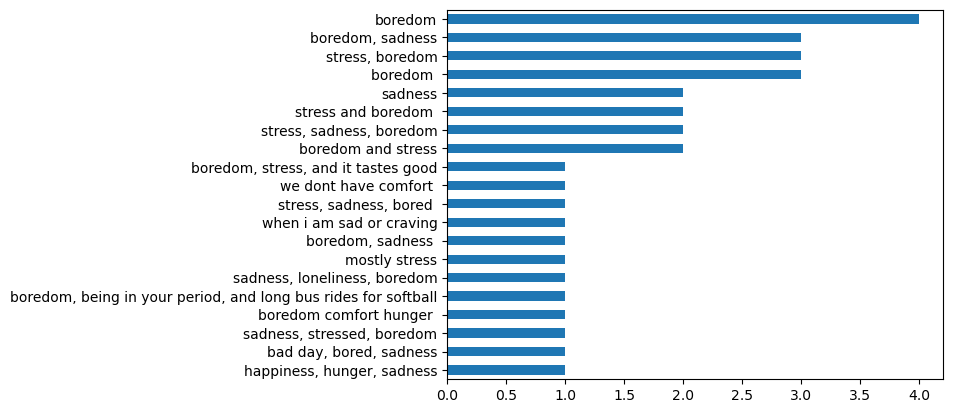

<Figure size 1500x500 with 0 Axes>

In [33]:
df['comfort_food_reasons'].value_counts()

# ALL OF THE ELEMENTS IN THE 'COMFORT_FOOD_REASONS' ATTRIBUTE WILL BE CHANGED TO LOWER CASE
df['comfort_food_reasons'] = df['comfort_food_reasons'].str.lower()
df['comfort_food_reasons'].value_counts()[:20].sort_values().plot.barh()

plt.figure(figsize = (15,5))
plt.show()

**For the 'comfort_food' attribute, many of its items will be modified and/or changed because they are many items that are either spelled differently or incorrectly**

In [34]:
df['comfort_food'] = df['comfort_food'].str.replace('\r','',regex=True).str.replace('&','and',regex=True).str.replace(
    ' ','',regex=True).str.replace('macandcheese', 'macncheese',regex=True).str.replace('macaroniandcheese',
'macncheese',regex=True).str.replace(',and',',',regex=True).str.replace(',&', '',regex=True).str.replace(
    
'.',',',regex=True).str.replace('burgers','burger',regex=True).str.replace('/','',regex=True).str.replace(
'wegmanscookies', 'cookies',regex=True).str.replace('icecream', 'ICE',regex=True).str.replace('icecrea',
'icecream',regex=True).str.replace('ICE', 'icecream',regex=True).str.replace('browniesandsoda', 
'brownies,soda',regex=True).str.replace('darkchocolate','chocolate',regex=True).str.replace(
    
'chickenandpotatoes','chicken,potatoes',regex=True).str.replace('chipsanddip','chips,dip',regex=True).str.replace(
    
'potatochipsand','chips,',regex=True).str.replace('potatochips','chips',regex=True).str.replace(

'frostedbrownies','brownies',regex=True).str.replace('chocolatebrownie','brownies',regex=True).str.replace(
'chipsandsalsa','chips,dip',regex=True).str.replace('homemadelasagne','lasagna',regex=True).str.replace(
'macincheese','macncheese',regex=True).str.replace('pizzachocolatechipsbagelsicecapps',
'pizza,chocolate,chips,bagels,coffee',regex=True).str.replace('spongecandy','candy',regex=True).str.replace(
    
'tomatosoup','soup',regex=True).str.replace('twizzlers','candy',regex=True).str.replace('candyandkitkat',
'candy,chocolate',regex=True).str.replace('icecreammilkshake','icecream,milkshake',regex=True).str.replace(
'ice-cream','icecream',regex=True).str.replace('chipsandcheese','chips,cheese',regex=True).str.replace(
'spaghettisquash','spaghetti,squash',regex=True).replace("candypopchocolatechipotlemoe's",
'candypop,chocolate,chipotle,moes',regex=True).replace("chocolate,terrachips,reese'scups(chocolate),breadcrackerswithcottagecheese",
'chocolate,chips,breadcrackerswithcottagecheese',regex=True).str.replace('seaweedsoup','soup',regex=True).str.replace(
'chipssweetspopcorn','chips,sweets,popcorn',regex=True).str.replace('pizzacookiessteak','pizza,cookies,steak',
regex=True).str.replace('potatosoup','soup',regex=True)

In [35]:
df['comfort_food'].values

array(['none', 'chocolate,chips,icecream', 'icecream,chocolate,chips',
       'candy,brownies,soda,', 'chocolate,icecream,frenchfries,pretzels',
       'icecream,cheeseburger,chips,', 'donuts,icecream,chips',
       'macncheese,chocolate,pasta',
       'pasta,grandmahomemadechocolatecakeanythinghomemade',
       'chocolate,pasta,soup,chips,popcorn', 'cookies,popcorn,chips',
       'icecream,cake,chocolate',
       'pizza,fruit,spaghetti,chicken,potatoes',
       'saltfish,candy,chocolate', 'chips,cookies,icecream',
       'chocolate,icecream', 'fastfood,pizza,subs',
       'burger,chips,cookies', 'chilli,soup,potpie',
       'soup,pasta,brownies,cake', 'chocolate,icecream,milkshake,cookies',
       'chips,icecream,microwaveablefoods', 'chickenfingers,pizza',
       'cookies,hotchocolate,beefjerky',
       'soup,pizza,fritos,meatballsub,dr,pepper', 'chips,dip,pepsi,',
       'frenchfries,chips,icecream',
       'macncheese,peanutbutterandbananasandwich,omelet',
       'pizza,doughnuts,m

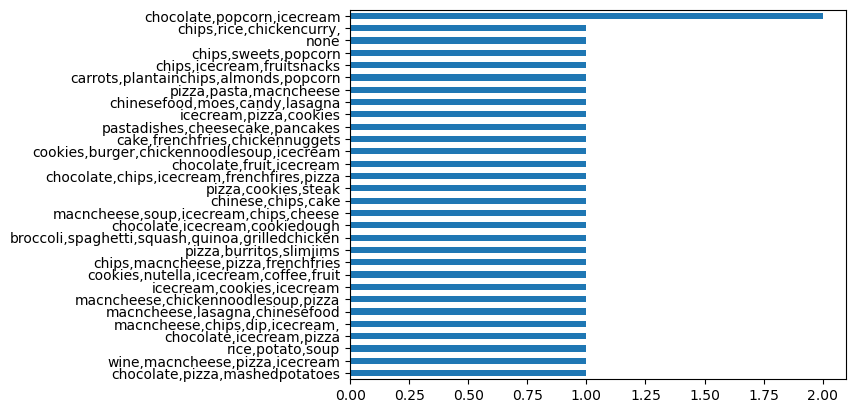

<Figure size 1500x500 with 0 Axes>

In [36]:
df['comfort_food'].value_counts()[:30].sort_values().plot.barh()
plt.figure(figsize = (15,5))
plt.show()

**FOR THE COMFORT_FOOD_REASONS, THERE WAS ALSO A LOT THAT HAD TO BE CHANGED AND MODIFIED IN ORDER TO MAKE THE DATA CLEARER**

In [37]:
df['comfort_food_reasons'] = df['comfort_food_reasons'].str.replace('and',',',regex=True).str.replace('/', 
',',regex=True).str.replace('.',',',regex=True).str.replace('&','',regex=True).str.replace('!', '',
regex=True).str.replace(' ', '',regex=True).str.replace('(','',regex=True).str.replace(')','',regex=True).str.replace(

'bordem','bored',regex=True).str.replace('boredom','bored',regex=True).str.replace('iusuallyonlyeatcomfortfoodswheniambored',
'bored',regex=True).str.replace('boredwheniaminmyapartment','bored',regex=True).str.replace('ieatcomfortfoodwhenimstressedoutfromschoolfinalsweek',
'stress',regex=True).str.replace('boredusually','bored',regex=True).str.replace('boredcomforthunger',
'bored',regex=True).str.replace('wheni`msad','sadness',regex=True).str.replace('myboyfriendsometimesmakesmesad',
'sadness',regex=True).str.replace('iamalwaysstressout,','stress',regex=True).str.replace(
    
'ieatcomfortfoodwhenimstressoutfromschool','stress',regex=True).str.replace('mostlystress','stress',
regex=True).str.replace('stressed','stress',regex=True).str.replace('stres','S',regex=True).str.replace(
    
'S','stress',regex=True).str.replace('stresss','stress',regex=True).str.replace('whenifeeltired','tired',
regex=True).str.replace('wedonthavecomfort','none',regex=True).str.replace('cravings','craving',regex=True).str.replace(
    
'orjustcravingacheatmeal','craving',regex=True).str.replace('thenwheniamsadtocomfortme',
'sadness',regex=True).str.replace('iwillalsoeatthemwheniamhappytocelebrate','celebration',regex=True).str.replace(
    
'noreasons','none',regex=True).str.replace('laziness','lazy',regex=True).str.replace('lazyniss','lazy',
regex=True).str.replace('anxiousness','anxious',regex=True).str.replace('loneliness','lonely',regex=True).str.replace(
    
'wheniamsadorcraving','craving',regex=True).str.replace('icangoforhourswithouteating','none',regex=True).str.replace(
    
'winter','coldweather',regex=True).replace("none,idon'teatcomfortfood,ijusteatwheni'mhungry,",
'none',regex=True).replace("iusuallyonlyeatcomfortfoodwheni'mbored,ifiamdoingsomething,none",
'bored,busy,none',regex=True).replace("wheni`msad",'sadness',regex=True).replace("usuallyifi'msadordepressed,",
'depression',regex=True).replace("none,idon'teatcomfortfood,ijusteatwheni'mhungry,",'none',regex=True).replace(

"wheni'meatingwithmyclosefriends",'friends',regex=True).replace("wheni'meatingwithmyclosefriends,foodsmellorlookgood,tired",
'friends,ittastesgood,tired',regex=True)



In [38]:
df['comfort_food_reasons'].values

array(['none', 'stress,bored,anger', 'stress,bored,craving', 'none',
       'stress,bored',
       'stress,sadness,orwheniamdealingwithpersonalfamilyissues,',
       'bored', 'stress,anger,sadness', 'bored',
       'sadness,stress,coldweather', 'sadness,bored,latenightsnack',
       'stress,bored,specialoccasions', 'friends,environment,bored',
       'stress', 'bored,busy,none', 'sadness,stress',
       'happiness,satisfaction', 'sadness,depression', 'stress,bored',
       'alongday,notfeelingwell,coldweather', 'bored', 'bored,lazy',
       'bored', 'survival,bored', 'bored,anger,drunkeness',
       'stress,bored,,nighttime', 'bored,stress,sad', 'bored', 'bored',
       'stress', 'bored,stress', 'none', 'depression', 'tired',
       'bored,sadness', 'stress,bored,craving', 'hunger,bored',
       'sadness,bored,anger', 'bored,happiness,distraught',
       'stress,upset,craving', 'stress,bored', 'lazy',
       'bored,sadness,anger', 'stress,anger,bored', 'bored,stress',
       'bored,cel

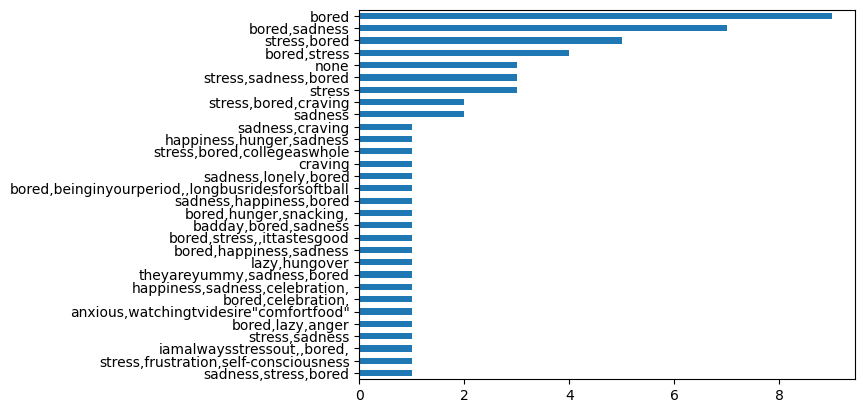

<Figure size 1500x500 with 0 Axes>

In [39]:
df['comfort_food_reasons'].value_counts()[:30].sort_values().plot.barh()

plt.figure(figsize = (15,5))
plt.show()

In [40]:
df[['comfort_food','comfort_food_reasons']].head(10)

,comfort_food,comfort_food_reasons
0,none,none
1,"chocolate,chips,icecream","stress,bored,anger"
4,"icecream,chocolate,chips","stress,bored,craving"
5,"candy,brownies,soda,",none
6,"chocolate,icecream,frenchfries,pretzels","stress,bored"
7,"icecream,cheeseburger,chips,","stress,sadness,orwheniamdealingwithpersonalfam..."
8,"donuts,icecream,chips",bored
9,"macncheese,chocolate,pasta","stress,anger,sadness"
10,"pasta,grandmahomemadechocolatecakeanythinghome...",bored
11,"chocolate,pasta,soup,chips,popcorn","sadness,stress,coldweather"


**Now that both attributes have been modified and improved, they will now be combined into 1 single attribute**

**This will make applying the apriori algorithm much easier**

**Also, only about 75 of the records will be used as training data in order to create the associaition rules**

**The rest of the records will be used as testing data**

In [41]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [42]:
from mlxtend.frequent_patterns import apriori,association_rules
import tensorflow as tf 
import tensorflow.lite as tflite
df['cf_and_cfr'] = df['comfort_food'].astype(str)+ "," + df['comfort_food_reasons'].astype(str) 
#COMBINES BOTH OF THEM 

df['cf_and_cfr'] = df['cf_and_cfr'].str.replace(',,', ',',regex=True) 

data = pd.DataFrame(df['cf_and_cfr'])

In [43]:
data = pd.DataFrame(df['cf_and_cfr'])
df['cf_and_cfr'] = df['cf_and_cfr'].str.replace(',,', ',',regex=True) 
data = pd.DataFrame(df['cf_and_cfr'])
training_data = data.iloc[:75,:]
training_data

,cf_and_cfr
0,"none,none"
1,"chocolate,chips,icecream,stress,bored,anger"
4,"icecream,chocolate,chips,stress,bored,craving"
5,"candy,brownies,soda,none"
6,"chocolate,icecream,frenchfries,pretzels,stress..."
...,...
91,"macncheese,chickennoodlesoup,pizza,bored,stress"
92,"chocolate,chips,icecream,frenchfires,pizza,str..."
93,"macncheese,lasagna,chinesefood,bored,sadness"
94,"candy,chinese,mcdonalds,lazy,hungover"


**NOW THE VALUES IN NEW ATTRIBUTE THAT WAS CREATED WILL BE SEPARARTED AND PUT INTO AN ARRAY**

In [44]:
t = []
for i in range(0,len(training_data)):
    t.append(training_data.values[i,0].split(','))
t

[['none', 'none'],
 ['chocolate', 'chips', 'icecream', 'stress', 'bored', 'anger'],
 ['icecream', 'chocolate', 'chips', 'stress', 'bored', 'craving'],
 ['candy', 'brownies', 'soda', 'none'],
 ['chocolate', 'icecream', 'frenchfries', 'pretzels', 'stress', 'bored'],
 ['icecream',
  'cheeseburger',
  'chips',
  'stress',
  'sadness',
  'orwheniamdealingwithpersonalfamilyissues',
  ''],
 ['donuts', 'icecream', 'chips', 'bored'],
 ['macncheese', 'chocolate', 'pasta', 'stress', 'anger', 'sadness'],
 ['pasta', 'grandmahomemadechocolatecakeanythinghomemade', 'bored'],
 ['chocolate',
  'pasta',
  'soup',
  'chips',
  'popcorn',
  'sadness',
  'stress',
  'coldweather'],
 ['cookies', 'popcorn', 'chips', 'sadness', 'bored', 'latenightsnack'],
 ['icecream', 'cake', 'chocolate', 'stress', 'bored', 'specialoccasions'],
 ['pizza',
  'fruit',
  'spaghetti',
  'chicken',
  'potatoes',
  'friends',
  'environment',
  'bored'],
 ['saltfish', 'candy', 'chocolate', 'stress'],
 ['chips', 'cookies', 'icecrea

In [45]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
cf_ary = te.fit(t).transform(t)

Df = pd.DataFrame(cf_ary, columns = te.columns_)
Df=Df.replace(False,0)
Df = Df.replace(True,1)
Df

,,almonds,alongday,anger,badday,bagels,beefjerky,beinginyourperiod,bored,broccoli,...,spaghetti,specialoccasions,squash,steak,stress,subs,survival,sweets,tired,upset
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
71,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
72,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
73,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
#Apriori model 
from mlxtend.frequent_patterns import fpgrowth

rules1 = apriori(Df.astype('bool'), min_support= 0.2, use_colnames = True)
rules1
r1 = rules1.sort_values(by='support', ascending = False)
r1

,support,itemsets
0,0.706667,(bored)
3,0.426667,(icecream)
6,0.386667,(stress)
5,0.320000,(sadness)
8,0.320000,"(bored, icecream)"
1,0.306667,(chips)
2,0.293333,(chocolate)
10,0.280000,"(bored, stress)"
4,0.266667,(pizza)
7,0.226667,"(bored, chips)"


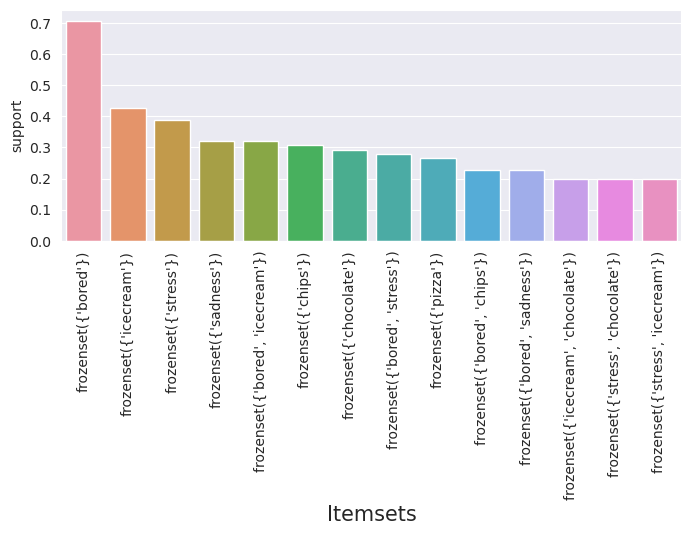

In [47]:
plt.figure(figsize = (8,3))
sns.set_style("darkgrid")
sns.barplot(data = r1, y = r1.support, x = r1.itemsets)
plt.xlabel('Itemsets', size = 15)
plt.xticks(rotation = 90)
plt.show()

**It seems that the most frequent 1-item sets are:**
**{BORED}, {ICECREAM}, {SADNESS}, AND {STRESS}**

**The most frequent 2-items sets are: 
{BORED,ICECREAM}, {STRESS,BORED}, {BORED, CHIPS}**

**Possible association rules:**

**(BORED -> ICECREAM), (ICECREAM -> BORED), (BORED -> SADNESS), (SADNESS -> BORED), (BORED -> CHIPS), (CHIPS -> BORED)**

In [48]:
d_c = association_rules(rules1, metric = "confidence", min_threshold = 0.2)
d_c
d_c1 = d_c.sort_values(by='confidence', ascending = False)
d_c1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(icecream),(bored),0.426667,0.706667,0.320000,0.750000,1.061321,0.018489,1.173333
1,(chips),(bored),0.306667,0.706667,0.226667,0.739130,1.045939,0.009956,1.124444
7,(stress),(bored),0.386667,0.706667,0.280000,0.724138,1.024723,0.006756,1.063333
5,(sadness),(bored),0.320000,0.706667,0.226667,0.708333,1.002358,0.000533,1.005714
9,(chocolate),(icecream),0.293333,0.426667,0.200000,0.681818,1.598011,0.074844,1.801905
11,(chocolate),(stress),0.293333,0.386667,0.200000,0.681818,1.763323,0.086578,1.927619
10,(stress),(chocolate),0.386667,0.293333,0.200000,0.517241,1.763323,0.086578,1.463810
12,(stress),(icecream),0.386667,0.426667,0.200000,0.517241,1.212284,0.035022,1.187619
8,(icecream),(chocolate),0.426667,0.293333,0.200000,0.468750,1.598011,0.074844,1.330196
13,(icecream),(stress),0.426667,0.386667,0.200000,0.468750,1.212284,0.035022,1.154510


**It seems that the strong association rules are:**

**CHIPS -> BORED; ICRECREAM -> BORED**


****Now the association rules will be evaluated on the test data****

In [49]:
test_data = data.iloc[75:,:]
test_data

,cf_and_cfr
96,"icecream,cake,pop,pizza,milkshakes,happiness,s..."
99,"macncheese,brownies,chickennuggs,theyareyummy,..."
103,"chocolate,terrachips,reese'scups(chocolate),br..."
105,"icecream,chips,candy,bored,lazy,anger"
106,"pizza,soda,brownies,chickentikkamasalaandbutte..."
107,"chocolate,pasta,cookies,iamalwaysstressout,bored,"
108,"candy,saltysnacks,toast,stress,sadness,bored"
109,"macncheese,pizza,mozzarellasticks,stress,frust..."
110,"icecream,pizza,chocolate,sadness,craving"
112,"chocolate,icecream,pizza,sadness,happiness,bored"


In [50]:
c = 0
s1 = 0
s2 = 0
for item in test_data['cf_and_cfr']:
    item = item.split(",")
    if (('icecream' in item) == True):
        s1 = s1 + 1 
        if(('bored' in item) == True):
            c = c +1

s2 = c / len(test_data)
s1 = s1/ len(test_data)
c1 = s2/ s1
print("Association rule #1 confidence: ") 
c1 


Association rule #1 confidence: 


0.7499999999999999

In [51]:
c_2 = 0
s1_2 = 0
s2_2 = 0
for item in test_data['cf_and_cfr']:
    item = item.split(",")
    if (('chips' in item) == True):
        s1_2 = s1_2 + 1 
        if(('bored' in item) == True):
            c_2 = c_2 +1
s2_2 = c_2/len(test_data)
s1_2 = s1_2/len(test_data)
c2 = s2_2/s1_2
print("Association rule #2 confidence")
c2

Association rule #2 confidence


1.0

In [52]:
c_3 = 0
s1_3 = 0
s2_3 = 0
for item in test_data['cf_and_cfr']:
    item = item.split(",")
    if (('bored' in item) == True):
        s1_3 = s1_3 + 1 
        if(('chips' in item) == True):
            c_3 = c_3 +1
s2_3 = c_3/len(test_data)
s1_3 = s1_3/len(test_data)
c3 = s2_3/s1_3
print("Association rule #3 confidence")
c3

Association rule #3 confidence


0.36363636363636365

In [53]:
c_4 = 0
s1_4 = 0
s2_4 = 0
for item in test_data['cf_and_cfr']:
    item = item.split(",")
    if (('bored' in item) == True):
        s1_4 = s1_4 + 1 
        if(('sadness' in item) == True):
            c_4 = c_4 +1
s2_4 = c_4/len(test_data)
s1_4 = s1_4/len(test_data)
c4 = s2_4/s1_4
print("Association rule #2 confidence")
c4

Association rule #2 confidence


0.45454545454545453

**Strong association rules for the first model seem to continue to be strong assciaton rules and the weak association rules continue to be weak**

In [54]:
#FP-growth model 
rules2 = fpgrowth(Df, min_support=0.2, use_colnames=True)
rules2
r2 = rules2.sort_values(by='support', ascending = False)
r2

,support,itemsets
0,0.706667,(bored)
1,0.426667,(icecream)
2,0.386667,(stress)
5,0.320000,(sadness)
7,0.320000,"(bored, icecream)"
3,0.306667,(chips)
4,0.293333,(chocolate)
8,0.280000,"(bored, stress)"
6,0.266667,(pizza)
10,0.226667,"(bored, chips)"


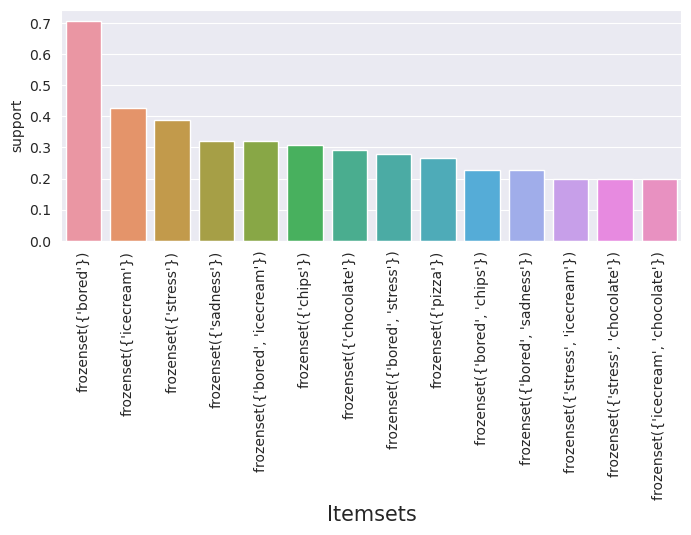

In [55]:
plt.figure(figsize = (8,3))
sns.set_style("darkgrid")
sns.barplot(data = r2, y = r2.support, x = r2.itemsets)
plt.xlabel('Itemsets', size = 15)
plt.xticks(rotation = 90)
plt.show()

In [56]:
d_cc = association_rules(rules2, metric = "confidence", min_threshold = 0.2)
d_cc1 = d_cc.sort_values(by='confidence', ascending = False)
d_cc1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(icecream),(bored),0.426667,0.706667,0.320000,0.750000,1.061321,0.018489,1.173333
7,(chips),(bored),0.306667,0.706667,0.226667,0.739130,1.045939,0.009956,1.124444
3,(stress),(bored),0.386667,0.706667,0.280000,0.724138,1.024723,0.006756,1.063333
13,(sadness),(bored),0.320000,0.706667,0.226667,0.708333,1.002358,0.000533,1.005714
9,(chocolate),(stress),0.293333,0.386667,0.200000,0.681818,1.763323,0.086578,1.927619
11,(chocolate),(icecream),0.293333,0.426667,0.200000,0.681818,1.598011,0.074844,1.801905
4,(stress),(icecream),0.386667,0.426667,0.200000,0.517241,1.212284,0.035022,1.187619
8,(stress),(chocolate),0.386667,0.293333,0.200000,0.517241,1.763323,0.086578,1.463810
5,(icecream),(stress),0.426667,0.386667,0.200000,0.468750,1.212284,0.035022,1.154510
10,(icecream),(chocolate),0.426667,0.293333,0.200000,0.468750,1.598011,0.074844,1.330196


**Association rules for both models are the same**

**It can be assumed that the model evaluation for both models is the same as well**

**Based on the results from both models, if someone has chips or ice cream as one of their comfort foods, it can be predicted that one of their reasons is boredom**